# <span style="color:blue"> Esercitazione 11 </span>
#### NOTA PER IL LETTORE:
Per questi ultimi due notebooks si è scelto di programmare direttamente in questo ambiente, per cui la struttura del testo è differente rispetto agli altri papers. Resta presente una breve sintesi della consegna, ma la discussione del lavoro e la presentazione del codice finale vengono svolte simultanealmente all'analisi dati.

## <span style="color:blue"> Esercizio 1 
Si tratta soltanto di fare pratica con la rete proposta, modificandone i parametri per comprendere come varia l'apprendimento. La conclusione è quella che il fattore cruciale per il miglioramento delle prestazioni della rete è il numero di dati di training. Più grande è tale dataset e migliore è l'apprendimento della rete. Ma del resto è alquanto scontato.

## <span style="color:blue"> Esercizio 2
### Scopo dell'esercizio
Si chiede di implementare una rete feed forward per approssimare il polinomio di terzo grado $$f(x)=3x^3-2x^2-3x+4,$$ esplorando varie architetture e confrontandole tra loro.
    
### Discussione del lavoro
Per la costruzione della rete, si è proceduto per complessità crescente. La rete proposta nella traccia dell'esercizio contiene un singolo neurone ed è in grado di approssimare una funzione lineare. Si è cercato di complicarne la struttura per cercare di approssimare una parabola $g(x)=x^2$ e , dopo di che, una cubica $h(x)=x^3$. Per la parabola sono sufficienti 5 neuroni, ossia una rete $1 \rightarrow 5 \rightarrow 1$, per la cubica 10, ossia una rete $1 \rightarrow 10 \rightarrow 1$. Questi dati hanno fornito un ansatz per un primo tentativo di architettura che approssimi il polinomio richiesto $f(x)$.

### <span style="color:red"> Primo tentativo: un solo hidden layer

Tenendo conto che il polinomio di terzo grado in esame contiene potenze di tutti gli ordini e considerando anche l'aggiunta di una noise gaussiana nel dataset di input, il primo tentativo di rete è stato una rete con un singolo layer nascosto del tipo $$\color{red}{1 \rightarrow 20 \rightarrow 1}.$$
Su questa architettura si è iniziato a lavorare, fissando il numero di dati di input a $100000$, il numero di dati di test a $10000$ e la noise gaussiana di varianza $\sigma=0.01$. Il dataset è stato diviso in $32$ minibatches e il numero di epoche per l'apprendimento è stato pari a $40$. Inoltre, visto che l'output deve essere un generico numero reale, la funzione di attivazione dell'output layer è stata scelta lineare. A parte questo, si sono esplorate diverse possibilità di ottimizzatori, funzioni di attivazione per l'hidden layer e loss function per cercare di capire quale fosse la migliore combinazione possibile. <p>
**Prima analisi: ottimizzatori.** Si è proceduto per gradi. Per prima cosa si sono fissati la funzione di attivazione del layer nascosto (*ReLu*) e la loss function (*MSE*) e si è variato l'ottimizzatore. Sono state testate due diverse possibilità, lo SGD e l'Adam. In basso sono mostrati due grafici. Nel primo si valutano i risultati prodotti dalla rete **dopo** l'apprendimento se le vengono forniti dei nuovi input (in rosso), rispetto alla curva teoricamente prevista (in azzurro), nel secondo è mostrato l'andamento della loss function sui dataset **durante** l'apprendimento.

In [1]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='loss-1tent-relu.png'></td><td><img src='1tent-relu.png'></td></tr></table>"))

,


In [2]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='1tent-adam.png'></td><td><img src='loss-1tent-adam.png'></td></tr></table>"))

,


I risultati mostrano un andamento simile tra i due casi, anche se l'Adam sembrerebbe essere più rapido nell'apprendimento. Nonostante ciò, per ragioni di maggiore semplicità, si è deciso di lavorare sempre con lo Stochastic Gradient Discent. <p>
**Seconda analisi: loss function.** Dopo aver scelto in via definitiva l'ottimizzatore, si è passati alla funzione costo. Anche qui, come in precedenza, sono state vagliate due possibilità, la MSE e la MAE, i cui risultati sono mostrati in basso. Il caso MSE è stato già mostrato nelle figure precedenti, ma viene riproposto ancora.

In [4]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='loss-1tent-relu.png'></td><td><img src='1tent-relu.png'></td></tr></table>"))

,


In [3]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='1tent-mae.png'></td><td><img src='loss-1tent-mae.png'></td></tr></table>"))

,


La scelta del MAE porta a un andamento meno smooth della loss sui dati di test. Il rischio di non accorgersi di un eventuale overfitting è presente visto che tale andamento è poco regolare, per cui si è deciso di utilizzare la MSE nel seguito. <p>
**Terza analisi: attivazione.** L'ultimo tassello del mosaico è la funzione di attivazione. Ne sono state provate tre, la ReLu, la Elu e la Softplus. La ReLu è stata quella con cui si è lavorato finora ed è la prima delle figure in basso. Le altre due seguono.

In [1]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='loss-1tent-relu.png'></td><td><img src='1tent-relu.png'></td></tr></table>"))

,


In [5]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='loss-1tent-elu.png'></td><td><img src='1tent-elu.png'></td></tr></table>"))

,


In [7]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='loss-1tent-softplus.png'></td><td><img src='1tent-softplus.png'></td></tr></table>"))

,


La funzione Elu si è dimostrata la migliore ed è stata scelta come attivazione definitiva. <p>
Terminato questo primo tentativo, che ha avuto per lo più un ruolo di scrematura iniziale, si è iniziati a complicare l'architettura della rete, cercando di migliorarne le prestazioni.
    
### <span style="color:red"> Secondo tentativo (quello buono!) : due hidden layers
Si è aggiunto un layer ulteriore, passando a una rete del tipo $\color{red}{1 \rightarrow 10 \rightarrow 5 \rightarrow 1}$, con attivazione degli hidden layer *Elu*, ottimizzatore *SGD* e loss *MSE*. Siccome, come verrà spiegato tra poco, questa rappresenta la scelta che produce il risultato migliore e risulta essere l'architettura definitiva, qui di seguito vengono riportate le linee di codice dell'intero programma. <p>
### <span style="color:green"> Codice:
<span style="color:green"> *Inizializzazione dei parametri e dei dataset*

In [9]:
# target parameters of f(x) = a*x**3 + b*x**2 + c*x+ d
a=3 #a=3
b=-2 #b=-2
c=-3 #c=-3
d=4 #d=4

In [10]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100000)
x_valid = np.random.uniform(-1, 1, 10000)
x_valid.sort()
y_target = a * x_valid**3 + b* x_valid**2 + c* x_valid +d  # ideal (target) function

sigma = 0.01 # noise standard deviation
y_train = np.random.normal(a*x_train**3+b*x_train**2+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3+b*x_valid**2+c*x_valid+d, sigma)

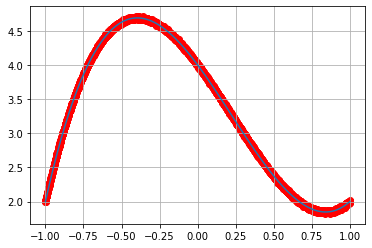

In [11]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

<span style="color:green"> *Definizione del modello*

In [12]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='elu'))
model.add(Dense(5 , activation='elu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


<span style="color:green"> *Apprendimento*

In [13]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2/40
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/40
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/40
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 5/40
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/40
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/40
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 8/40
3125/3125 [==============================] - 4s 1ms

In [14]:
# return weights
model.get_weights()

[array([[ 1.4336966 , -1.7723681 ,  0.5231331 ,  0.7232157 ,  1.1926556 ,
         -0.0483549 ,  0.6804351 ,  0.06305376, -0.30146095, -0.4317029 ]],
       dtype=float32),
 array([ 0.3164203 , -1.6534076 , -0.07680018,  0.00744116,  0.09649555,
         0.26875702,  0.48182896, -0.19573665,  0.2130554 ,  0.24338418],
       dtype=float32),
 array([[-0.11501509, -1.0220585 ,  0.5491349 , -0.23626003, -0.11995286],
        [ 0.51993257, -1.2860914 ,  0.44618285,  1.0757867 ,  1.1749747 ],
        [ 0.43390128, -0.38881278, -0.10135213, -0.39836815,  0.07969331],
        [-0.70670706, -0.80330646,  0.2051344 ,  0.46108276, -0.11547754],
        [-0.028119  , -1.0291759 , -0.57509744,  0.44892278, -0.51067024],
        [-0.42912334,  0.39811015,  0.61952543, -0.30452183, -0.30830866],
        [-0.26104397,  0.1335642 , -0.6757135 , -0.7092369 , -0.2827915 ],
        [-0.14548017, -0.18684056, -0.0018232 ,  0.21185474,  0.3268194 ],
        [-0.40022305,  0.35330874,  0.6486738 ,  0.673626

<span style="color:green"> *Risultati finali*

In [15]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 8.1014e-04 - mse: 8.1014e-04

Test loss: 0.000810141209512949
Test accuracy: 0.000810141209512949


In [16]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 7.0778e-04 - mse: 7.0778e-04

Test loss: 0.0007077825139276683
Test accuracy: 0.0007077825139276683


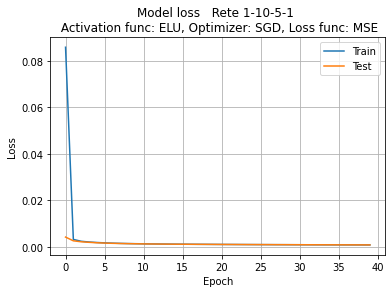

In [17]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.title('Model loss   Rete 1-10-5-1 \n Activation func: ELU, Optimizer: SGD, Loss func: MSE')
plt.show()

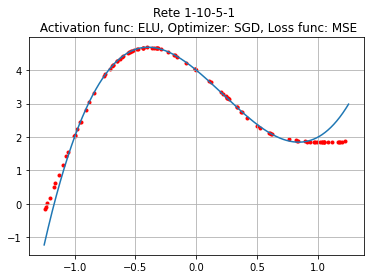

In [23]:
x_predicted = np.random.uniform(-1.25, 1.25, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',marker='.')

x_valid = np.random.uniform(-1.25, 1.25, 10000)
x_valid.sort()
y_target = a * x_valid**3 + b* x_valid**2 + c* x_valid +d  # ideal (target) function
plt.plot(x_valid, y_target)
plt.title('Rete 1-10-5-1 \n Activation func: ELU, Optimizer: SGD, Loss func: MSE')
plt.grid(True)
plt.show()

La rete è stata testata anche su punti al di fuori del dominio e il risultato è quanto mai evidente. Mentre per $x \in [-1,1]$ vi è un perfetto accordo tra risultati e curva teorica, basta allontanarsi da questo dominio perchè la rete produca output totalmente diversi da quelli attesi. Non essendo stato svolto apprendimento in quella regione, la rete si mostra totalmente inadatta.

### <span style="color:red"> Terzo tentativo: tre hidden layers
È possibile migliorare il comportamento della rete fuori dall'intervallo di training? Per vederlo, si è provato a complicare ancora l'architettura, inserendo un terzo layer nascosto. La rete utilizzata è una $\color{red}{1 \rightarrow 5 \rightarrow 20 \rightarrow 5 \rightarrow 1}$. I risultati ottenuti sono mostrati di seguito.

In [30]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='3tent-elu.png'></td><td><img src='loss-3tent-elu.png'></td></tr></table>"))

,


Come si osserva, il comportamento qualitativo non è cambiato. Sull'intervallo di training la rete performa bene, ma al di fuori non c'è verso di ottenere predizioni corrette senza un apprendimento preliminare. <span style="color:red"> Per questo motivo si è ritenuto che la precedente architettura $1 \rightarrow 10 \rightarrow 5 \rightarrow 1$ sia la configurazione più semplice che permetta di approssimare il polinomio $f(x)$ sull'intervallo $[-1,1]$. Al di fuori di questo range è necessario un ulteriore training per poter ritenere il teorema di approssimazione universale verificato.

## <span style="color:blue"> Esercizio 3
### Scopo dell'esercizio
L'esercizio 3 richiede di svolgere la stessa analisi per una funzione $f: \mathbb{R}^2 \rightarrow \mathbb{R}$, ovvero $f(x,y) = \sin(x^2+y^2)$, $x,y \in [-3/2,3/2]$.
    
### Discussione del lavoro
La procedura seguita per realizzare la rete presente è sostanzialmente analoga a quanto descritto in precedenza. Per tale ragione, si omette la descrizione di tutte le singole prove svolte per arrivare al risultato finale e si procede alla descrizione diretta del codice finale.
### <span style="color:green"> Codice:
<span style="color:green"> *Inizializzazione dei parametri e dei dataset* <p>
Questa volta il dataset di input ha dimensione due: esso consiste delle coordinate $(x,y)$ su cui calcolare la funzione $f$, mentre l'output ha ancora dimensione 1.
Per questo motivo, sono stati generati $100000$ dati di training e $10000$ dati di test (punti casuali nel quadrato $[-1.5,1.5]^2$). La noise applicata agli output generati è stata scelta pari a $\sigma=0.01$.

In [5]:
import numpy as np

# generate training inputs
np.random.seed(0)

n_train = 100000
n_valid = 10000

# generate synthetic training dataset
x_train = np.zeros((n_train, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, n_train)
x_train[:,1] = np.random.uniform(-1.5, 1.5, n_train)
    
# generate synthetic validation data
x_valid = np.zeros((n_valid, 2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, n_valid)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, n_valid)

x_valid_plot= np.copy(x_valid) #I copy and sort the array (I need it for plots of the target function)
x_valid_plot[:,0].sort()
x_valid_plot[:,1].sort()

f_target = np.sin(x_valid_plot[:,0]**2 + x_valid_plot[:,1]**2)  # ideal (target) function

sigma = 0.01 # noise standard deviation
f_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

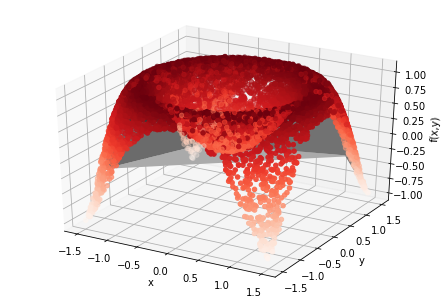

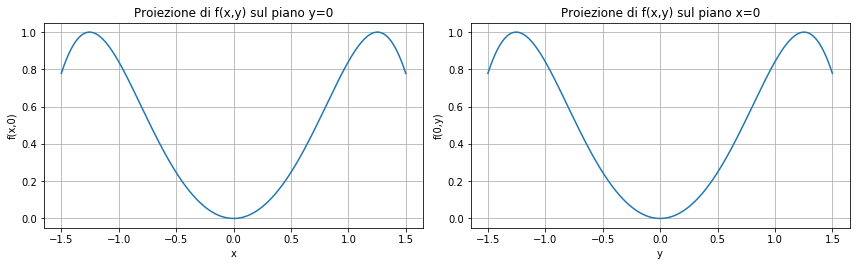

In [8]:
# plot training and target dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x_valid_plot[:,0], x_valid_plot[:,1], f_target, cmap='Greys')
ax.scatter(x_valid[:,0], x_valid[:,1], f_valid, c=f_valid, cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.grid(True)
plt.show()

                        
fig = plt.figure(figsize=(12, 3.8))
                         
ax = fig.add_subplot(121)
f_targetx = np.sin(x_valid_plot[:,0]**2)
ax.plot(x_valid_plot[:,0],f_targetx)
ax.set_title('Proiezione di f(x,y) sul piano y=0')
ax.set_xlabel('x')
ax.set_ylabel('f(x,0)')
ax.grid(True)

ax = fig.add_subplot(122)
f_targety = np.sin(x_valid_plot[:,1]**2)
ax.plot(x_valid_plot[:,1],f_targety)
ax.set_title('Proiezione di f(x,y) sul piano x=0')
ax.set_xlabel('y')
ax.set_ylabel('f(0,y)')
ax.grid(True)

plt.tight_layout()
plt.show()

Nella figura soprastante sono mostrati la superficie esatta nello spazio $\mathbb{R}^3$ che la rete deve riprodurre e i dati di validazione affetti da noise. Visto che la rappresentazione 3D non è molto chiara dal punto di vista prospettico, sono riportate anche le proiezioni sui piani cartesiani $(x,z)$ e $(y,z)$ della superficie teorica attesa. Esse saranno utili in seguito per verificare se la rete ha imparato. <p>
<span style="color:green"> *Definizione del modello* <p>
La rete implementata è stata sviluppata a partire dalla precedente, irrobustendola e adattandola alla funzione in esame. Si tratta di una rete $\color{green}{2 \rightarrow 20 \rightarrow 10 \rightarrow 1}$. Il layer di input ha dimensione 2 come già detto, il primo hidden layer consta di 20 neuroni con funzione di attivazione *Elu*, il secondo di dieci neuroni con attivazione *tanh*, mentre l'ultimo neurone ha una risposta di tipo lineare. Questo è giustificato dal fatto che la funzione da approssimare che ha codominio in $[-1,1]$. La soluzione prodotta dalla rete sarà una combinazione linare di tangenti iperboliche, che in linea di principio si presta bene come approssimante. L'argomento di ciascuna tanh può essere qualunque reale, perciò si è scelto di mantenere l'attivazione usata in precedenza nel caso del polinomio. <p>
Dopo svariate prove pratiche, si è deciso di sceglie come ottimizzatore l'*Adam*, perchè è quello che si è rivelato rendere più veloce la convergenza. La loss e la metric sono state prese pari alla norma 2. 

In [214]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,), activation='elu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_121 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


<span style="color:green"> *Apprendimento* <p>
Il numero di epoche scelto è stato pari a 5, in ciascuna delle quali viene processato un minibatch. Il numero di minibatches scelto è stato 32.

In [215]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=f_train, 
          batch_size=32, epochs=5,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, f_valid))

Epoch 1/5
3125/3125 [==============================] - 4s 1ms/step - loss: 0.1168 - mse: 0.1168 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 2/5
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/5
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 6.6728e-04 - val_mse: 6.6728e-04
Epoch 4/5
3125/3125 [==============================] - 3s 1ms/step - loss: 5.1859e-04 - mse: 5.1859e-04 - val_loss: 3.2973e-04 - val_mse: 3.2973e-04
Epoch 5/5
3125/3125 [==============================] - 3s 1ms/step - loss: 3.2505e-04 - mse: 3.2505e-04 - val_loss: 3.1033e-04 - val_mse: 3.1033e-04


In [216]:
# return weights
model.get_weights()

[array([[ 0.03071959,  0.56099814,  0.15668036, -0.25771776, -0.63860977,
          0.931411  ,  1.0849653 ,  0.46431765,  0.30326858, -0.27202982,
         -1.152012  , -0.4796906 ,  0.20485236,  0.62280864, -1.176437  ,
          0.75933295,  0.14104742,  0.5439155 ,  0.52529246, -0.6219867 ],
        [ 0.1634344 ,  0.14270285, -0.05779764, -0.526257  ,  0.2748595 ,
         -0.63133866,  0.5045048 ,  0.40544   , -0.37618917, -1.2665849 ,
          1.2460787 , -0.01733137,  1.1303313 , -0.04190499, -1.277291  ,
         -0.21225682,  0.02335973, -0.0525127 ,  0.45579183,  0.10708755]],
       dtype=float32),
 array([ 0.0881446 , -0.2973177 ,  0.36694625, -0.8010944 , -0.20508555,
        -0.39677578,  0.0080153 , -0.2631374 ,  0.16926147, -0.17436226,
        -0.7296347 , -0.29154906, -0.8564601 , -0.45454258, -0.5126417 ,
         0.06124415,  0.44226038, -0.2908136 , -0.1005772 , -0.07584992],
       dtype=float32),
 array([[-1.18674576e-01,  1.37782604e-01, -3.50937873e-01,
      

<span style="color:green"> *Risultati finali* 

In [223]:
# evaluate model
score = model.evaluate(x_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 3.1033e-04 - mse: 3.1033e-04

Test loss: 0.0003103284689132124
Test accuracy: 0.0003103284689132124


In [224]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, f_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.5190 - mse: 0.5190

Test loss: 0.5190361142158508
Test accuracy: 0.5190361142158508


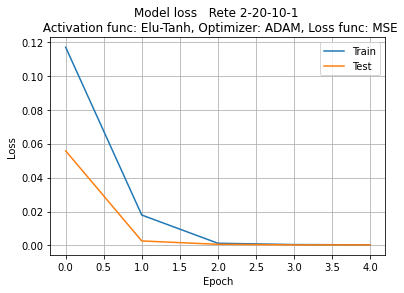

In [222]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.title('Model loss   Rete 2-20-10-1 \n Activation func: Elu-Tanh, Optimizer: ADAM, Loss func: MSE')
plt.show()

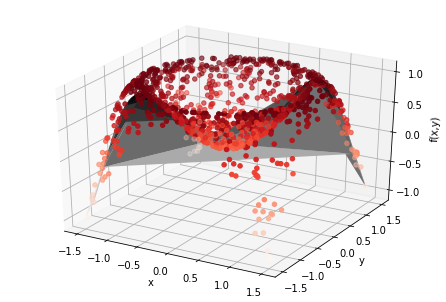

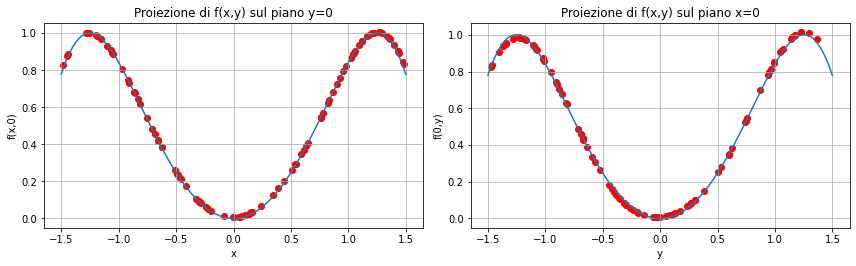

In [220]:
x_predicted = np.zeros((1000,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 1000)

f_predicted = model.predict(x_predicted)

f_target = np.sin(x_valid_plot[:,0]**2+ x_valid_plot[:,1]**2)  # ideal (target) function

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x_valid_plot[:,0], x_valid_plot[:,1], f_target, cmap='Greys')
ax.scatter(x_predicted[:,0], x_predicted[:,1], f_predicted, c=f_predicted, cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)

f_targetx = np.sin(x_valid_plot[:,0]**2)
x_predicted = np.zeros((100,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 100)
f_predicted = model.predict(x_predicted)

ax.plot(x_valid_plot[:,0],f_targetx)
ax.scatter(x_predicted[:,0],f_predicted, color='r')
ax.set_title('Proiezione di f(x,y) sul piano y=0')
ax.set_xlabel('x')
ax.set_ylabel('f(x,0)')
ax.grid(True)

ax = fig.add_subplot(122)

f_targety = np.sin(x_valid_plot[:,1]**2)
x_predicted = np.zeros((100,2))
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 100)
f_predicted = model.predict(x_predicted)

ax.plot(x_valid_plot[:,1],f_targety)
ax.scatter(x_predicted[:,1],f_predicted, color='r')
ax.set_title('Proiezione di f(x,y) sul piano x=0')
ax.set_xlabel('y')
ax.set_ylabel('f(0,y)')
ax.grid(True)

plt.tight_layout()
plt.show()

Il grafico della loss function mostra che la rete, anche con un numero esuiguo di epoche, ha appreso il dovuto e questo è verificato dal plot soprastante, in cui sono stato forniti alla rete nuovi input e confrontato le predizioni con i risultati attesi. <p>
Dal grafico 3D non è chiaro se i punti in rosso siano sovrapponibili alla superficie teorica, ma ogni dubbio viene fugato guardando le proiezioni del surface plot sui due piani cartesiani. <p>
Infatti fornendo alla rete degli input tipo $(x,0)$ o $(0,y)$, si osserva come le predizioni siano totalmente compatibili con la curva teorica attesa, mostrando il perfetto funzionamento della rete.